In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [9]:
df = pd.read_csv("../data/loan_approval_dataset.csv")

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

df.shape, df.head()

((4269, 13),
    loan_id  no_of_dependents      education self_employed  income_annum  \
 0        1                 2       Graduate            No       9600000   
 1        2                 0   Not Graduate           Yes       4100000   
 2        3                 3       Graduate            No       9100000   
 3        4                 3       Graduate            No       8200000   
 4        5                 5   Not Graduate           Yes       9800000   
 
    loan_amount  loan_term  cibil_score  residential_assets_value  \
 0     29900000         12          778                   2400000   
 1     12200000          8          417                   2700000   
 2     29700000         20          506                   7100000   
 3     30700000          8          467                  18200000   
 4     24200000         20          382                  12400000   
 
    commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
 0                 17600000     

In [10]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


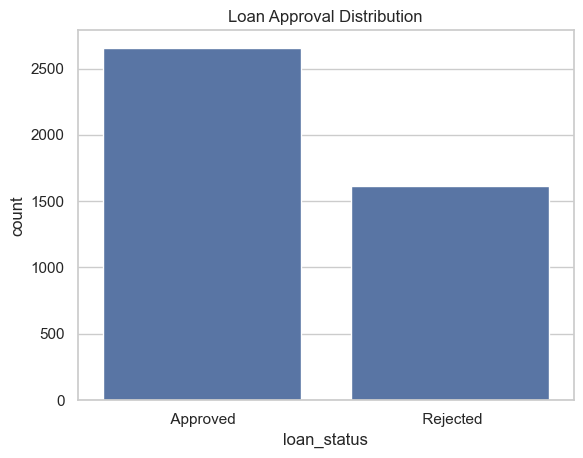

In [11]:
df['loan_status'].value_counts(normalize=True)

sns.countplot(data=df, x='loan_status')
plt.title("Loan Approval Distribution")
plt.show()


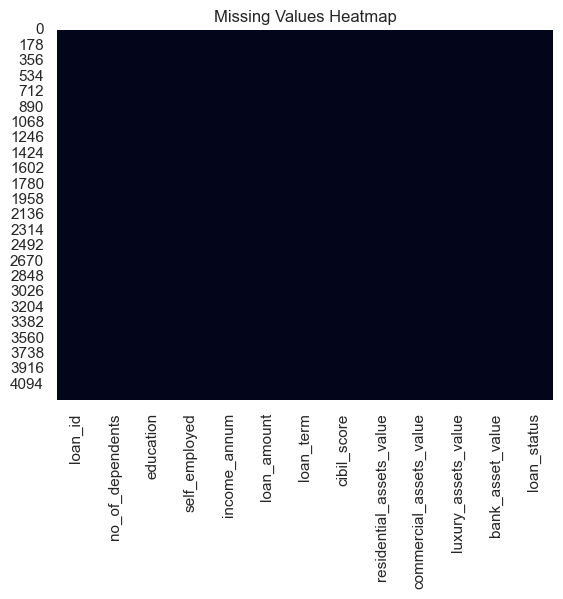

In [12]:
df.isnull().sum()

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


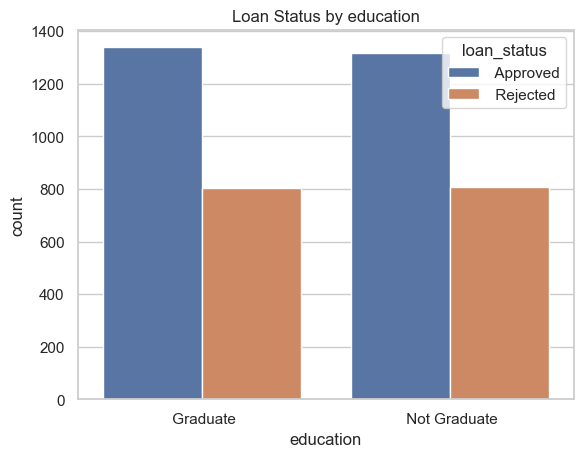

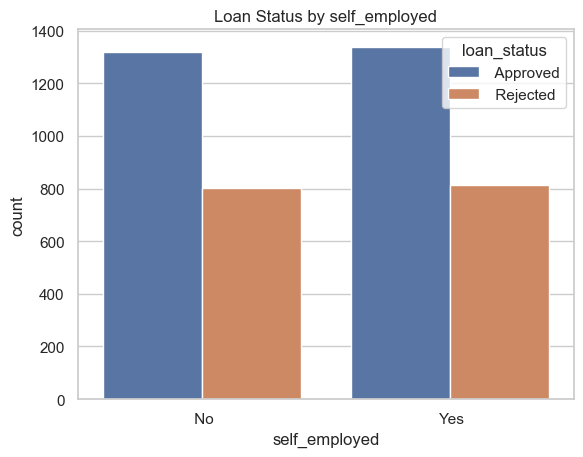

In [13]:
categorical_cols = ['education', 'self_employed']
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue="loan_status")
    plt.title(f"Loan Status by {col}")
    plt.show()

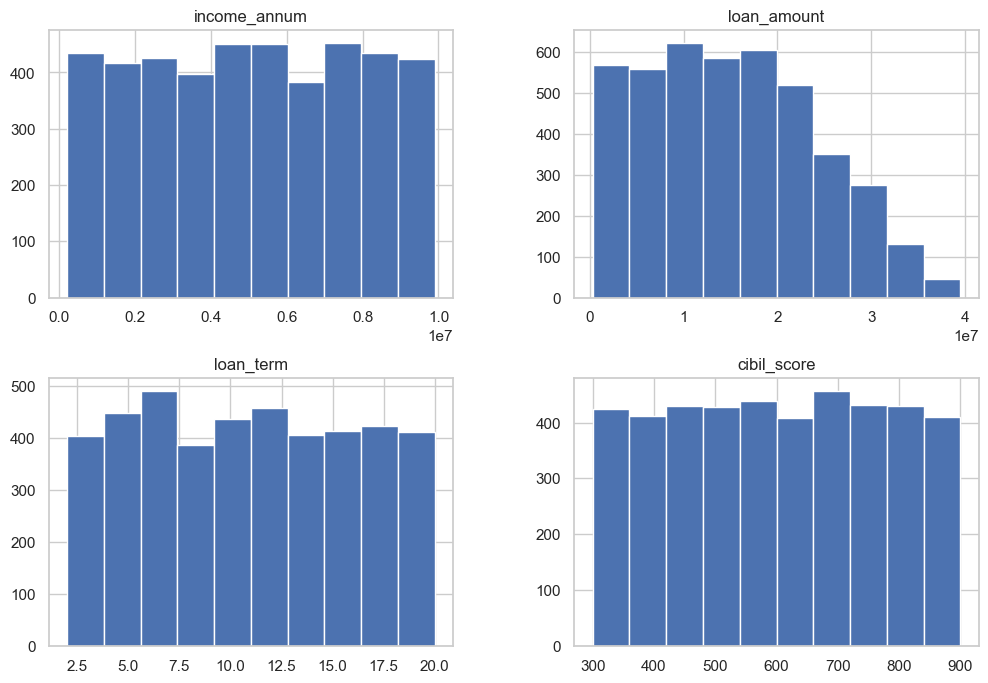

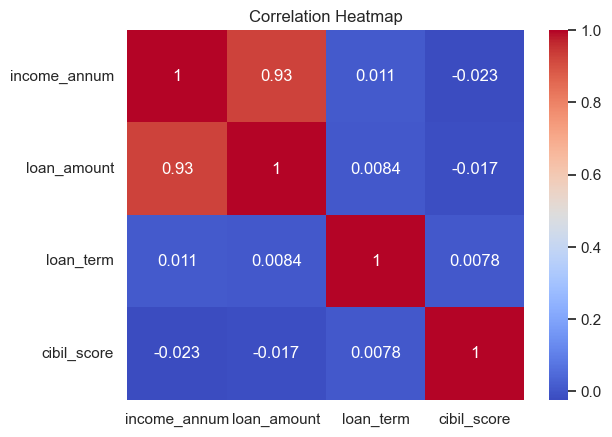

In [14]:
numeric_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
df[numeric_cols].hist(figsize=(12,8))
plt.show()

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
pd.crosstab(df['education'], df['loan_status'], normalize='index')

loan_status,Approved,Rejected
education,,
Graduate,0.624534,0.375466
Not Graduate,0.619765,0.380235


In [16]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].median())

In [18]:
import os

os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/loan_approval_clean.csv", index=False)